In [35]:
import pandas as pd
import numpy as np
from plotnine import *

In [107]:
# Opening population data
df_pop = pd.read_csv('../20_intermediate_files/state county population.csv', index_col=None)
df_pop = df_pop.drop('Year Code', axis = 1)
df_pop['state_code'] = df_pop["County"].str[-2:]
df_pop['county_name_only'] = df_pop["County"].str[:-11]
df_pop.head(2)

,State,State Code,County,County Code,Year,Population,state_code,county_name_only
0,Alabama,1,"Autauga County, AL",1001,1999,42963,AL,Autauga
1,Alabama,1,"Autauga County, AL",1001,2000,43671,AL,Autauga


In [108]:
df_pop.shape

(68423, 8)

In [109]:
df_x = df_pop.groupby(['State', 'State Code', 'County Code', 'Year', 'state_code', 'county_name_only']).sum().reset_index()
df_x.shape

(68423, 8)

In [110]:
abbrv = ['CA','NV','NY','TX','HI','IA','KS','ME','MA','MN','MT','NE','ND','OR','SD','VA','WY','AR','GA','MS', 'FL', 'WA']
df_pop = df_pop.loc[df_pop['state_code'].isin(abbrv),:]
df_pop.sample(5)

,State,State Code,County,County Code,Year,Population,state_code,county_name_only
48675,Oregon,41,"Tillamook County, OR",41057,2009,25179,OR,Tillamook
17707,Iowa,19,"Crawford County, IA",19047,1999,16911,IA,Crawford
19159,Iowa,19,"Wapello County, IA",19179,1999,36042,IA,Wapello
38243,Nevada,32,"Pershing County, NV",32027,2005,6580,NV,Pershing
57248,Texas,48,"Henderson County, TX",48213,2017,81064,TX,Henderson


In [111]:
# Random checking to make sure we have the states
(df_pop['State']=='Florida').value_counts()

False    33159
True      1474
Name: State, dtype: int64

In [ ]:
# Opening perscription data
df_pres = pd.read_csv('../20_intermediate_files/prescription_data_grouped_2.csv')
(df_pres['MME']==0).value_counts()


In [118]:
df_pres = df_pres.rename(columns={'Year':'T_YEAR'})

In [119]:
df_pres["T_YEAR"].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)

In [113]:
# Dropping unnecessary columns
df_pop = df_pop.drop(["State Code", "County", 'County Code'], axis=1)

In [114]:
df_pop.head(2)

,State,Year,Population,state_code,county_name_only
2422,Arkansas,1999,20966,AR,Arkansas
2423,Arkansas,2000,20749,AR,Arkansas


In [128]:
# Creating filter column for population df
df_pop_grouped = df_pop.groupby(['Year', 'State', 'state_code', 'county_name_only']).sum().reset_index()
df_pop_grouped['county_name_only'] = df_pop_grouped['county_name_only'].str.lower()
df_pop_grouped['Year_string'] = df_pop_grouped['Year'].astype('str')
df_pop_grouped['filter'] = df_pop_grouped['state_code'] + df_pop_grouped['county_name_only'] + df_pop_grouped['Year_string']
df_pop_grouped

,Year,State,state_code,county_name_only,Population,Year_string,filter
0,2007,Arkansas,AR,arkansas,19434,2007,ARarkansas2007
1,2007,Arkansas,AR,ashley,22229,2007,ARashley2007
2,2007,Arkansas,AR,baxter,41491,2007,ARbaxter2007
3,2007,Arkansas,AR,benton,203664,2007,ARbenton2007
4,2007,Arkansas,AR,boone,36759,2007,ARboone2007
...,...,...,...,...,...,...,...
9435,2012,Wyoming,WY,sweetwater,45267,2012,WYsweetwater2012
9436,2012,Wyoming,WY,teton,21675,2012,WYteton2012
9437,2012,Wyoming,WY,uinta,21025,2012,WYuinta2012
9438,2012,Wyoming,WY,washakie,8464,2012,WYwashakie2012


In [129]:
# Filtering year and lowercase county name
df_pop = df_pop.loc[(df_pop['Year']>2006) & (df_pop['Year']<=2012)]
df_pop['county_name_only'] = df_pop['county_name_only'].str.lower()

df_pres = df_pres.loc[(df_pres['T_YEAR']>2006) & (df_pres['T_YEAR']<=2012)]
df_pres['county_name_only'] = df_pres['BUYER_COUNTY'].str.lower()

In [130]:
# Grouping prescription df to avoid duplicate state and county name
df_pres_grouped = df_pres.groupby(['BUYER_STATE', 'BUYER_COUNTY', 'T_YEAR', 'county_name_only']).sum().reset_index()
df_pres_grouped

,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME
0,AR,ACCOMACK,2007,accomack,0.0
1,AR,ACCOMACK,2008,accomack,0.0
2,AR,ACCOMACK,2009,accomack,0.0
3,AR,ACCOMACK,2010,accomack,0.0
4,AR,ACCOMACK,2011,accomack,0.0
...,...,...,...,...,...
144667,WY,ZAVALA,2008,zavala,0.0
144668,WY,ZAVALA,2009,zavala,0.0
144669,WY,ZAVALA,2010,zavala,0.0
144670,WY,ZAVALA,2011,zavala,0.0


In [131]:
# Creating filter column for population df
df_pres_grouped['Year'] = df_pres_grouped['T_YEAR'].astype('str')
df_pres_grouped['filter'] = df_pres_grouped['BUYER_STATE'] + df_pres_grouped['county_name_only'] + df_pres_grouped['Year']
df_pres_grouped.loc[df_pres_grouped['BUYER_STATE']=='FL']


,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME,Year,filter
13152,FL,ACCOMACK,2007,accomack,0.0,2007,FLaccomack2007
13153,FL,ACCOMACK,2008,accomack,0.0,2008,FLaccomack2008
13154,FL,ACCOMACK,2009,accomack,0.0,2009,FLaccomack2009
13155,FL,ACCOMACK,2010,accomack,0.0,2010,FLaccomack2010
13156,FL,ACCOMACK,2011,accomack,0.0,2011,FLaccomack2011
...,...,...,...,...,...,...,...
19723,FL,ZAVALA,2008,zavala,0.0,2008,FLzavala2008
19724,FL,ZAVALA,2009,zavala,0.0,2009,FLzavala2009
19725,FL,ZAVALA,2010,zavala,0.0,2010,FLzavala2010
19726,FL,ZAVALA,2011,zavala,0.0,2011,FLzavala2011


In [132]:
# filtering the data to only county and state exist in population data
df_pres_grouped.loc[df_pres_grouped['filter'].isin(df_pop_grouped['filter']),:]

,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME,Year,filter
180,AR,ARKANSAS,2007,arkansas,5.950277e+06,2007,ARarkansas2007
181,AR,ARKANSAS,2008,arkansas,6.418230e+06,2008,ARarkansas2008
182,AR,ARKANSAS,2009,arkansas,6.643993e+06,2009,ARarkansas2009
183,AR,ARKANSAS,2010,arkansas,7.564533e+06,2010,ARarkansas2010
184,AR,ARKANSAS,2011,arkansas,7.502462e+06,2011,ARarkansas2011
...,...,...,...,...,...,...,...
144361,WY,WESTON,2008,weston,2.594849e+06,2008,WYweston2008
144362,WY,WESTON,2009,weston,2.254283e+06,2009,WYweston2009
144363,WY,WESTON,2010,weston,2.074412e+06,2010,WYweston2010
144364,WY,WESTON,2011,weston,2.103822e+06,2011,WYweston2011


In [133]:
# dropping unnecessary columns
df_pop_grouped = df_pop_grouped.drop(['Year_string', 'filter'], axis=1)
df_pres_grouped = df_pres_grouped.drop(['Year', 'filter'], axis=1)

In [135]:
# Merge both dataframe into merged_df
merged_df = df_pop_grouped.merge(df_pres_grouped, left_on=["Year","state_code","county_name_only"], right_on=["T_YEAR","BUYER_STATE","county_name_only"])
# merged_df = merged_df.drop(["BUYER_STATE", "BUYER_COUNTY", "Year"], axis=1)

In [136]:
# Checking value below 10 (small value of mme seems irrelevant)
merged_df.loc[merged_df['MME']<10,:]

,Year,State,state_code,county_name_only,Population,BUYER_STATE,BUYER_COUNTY,T_YEAR,MME
143,2007,Florida,FL,desoto,34537,FL,DESOTO,2007,0.0
151,2007,Florida,FL,glades,12357,FL,GLADES,2007,0.0
199,2007,Georgia,GA,baker,3706,GA,BAKER,2007,0.0
311,2007,Georgia,GA,quitman,2529,GA,QUITMAN,2007,0.0
323,2007,Georgia,GA,talbot,7026,GA,TALBOT,2007,0.0
...,...,...,...,...,...,...,...,...,...
8733,2012,Texas,TX,roberts,854,TX,ROBERTS,2012,0.0
8752,2012,Texas,TX,sterling,1191,TX,STERLING,2012,0.0
8758,2012,Texas,TX,terrell,917,TX,TERRELL,2012,0.0
8836,2012,Virginia,VA,king and queen,7046,VA,KING AND QUEEN,2012,0.0


In [146]:
merged_df['Population'] = merged_df.Population.astype('int')

In [147]:
# defining control states
we_want_florida = ['Nevada', 'New York', 'California']

df_florida = merged_df[merged_df['State'].isin(we_want_florida)]

In [148]:
df_florida

,Year,State,state_code,county_name_only,Population,BUYER_STATE,BUYER_COUNTY,T_YEAR,MME
74,2007,California,CA,alameda,1455715,CA,ALAMEDA,2007,5.076008e+08
75,2007,California,CA,amador,38756,CA,AMADOR,2007,2.215511e+07
76,2007,California,CA,butte,217469,CA,BUTTE,2007,1.673523e+08
77,2007,California,CA,calaveras,46268,CA,CALAVERAS,2007,2.312143e+07
78,2007,California,CA,colusa,21075,CA,COLUSA,2007,5.569719e+06
...,...,...,...,...,...,...,...,...,...
8406,2012,New York,NY,washington,62934,NY,WASHINGTON,2012,2.055229e+07
8407,2012,New York,NY,wayne,92962,NY,WAYNE,2012,2.579914e+07
8408,2012,New York,NY,westchester,961670,NY,WESTCHESTER,2012,2.421713e+08
8409,2012,New York,NY,wyoming,41892,NY,WYOMING,2012,1.094492e+07


In [149]:
# Grouping control state
groupedby_df_florida = df_florida.groupby(["Year"]).sum() 
groupedby_df_florida = groupedby_df_florida.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_florida['Prescription_Rate'] = (groupedby_df_florida['MME']/groupedby_df_florida['Population'])*100_000

groupedby_df_florida['Policy_Change'] = "Control"

In [150]:
groupedby_df_florida

,Year,Population,T_YEAR,MME,Prescription_Rate,Policy_Change
0,2007,57810741,264924,1.365879e+10,2.362673e+07,Control
1,2008,58297046,265056,1.523870e+10,2.613975e+07,Control
2,2009,58779322,265188,1.704876e+10,2.900468e+07,Control
3,2010,59159423,265320,1.838216e+10,3.107224e+07,Control
4,2011,59705550,263441,1.940871e+10,3.250738e+07,Control
5,2012,60197713,265584,1.975187e+10,3.281166e+07,Control


In [151]:
# Grouping treatment state
we_want_only_florida = ['Florida']

df_only_florida = merged_df[merged_df['State'].isin(we_want_only_florida)]

groupedby_df_only_florida = df_only_florida.groupby(["Year"]).sum() 
groupedby_df_only_florida = groupedby_df_only_florida.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
groupedby_df_only_florida['Prescription_Rate'] = (groupedby_df_only_florida['MME']/groupedby_df_only_florida['Population'])*100_000

groupedby_df_only_florida['Policy_Change'] = "Treatment"

In [152]:
groupedby_df_only_florida

,Year,Population,T_YEAR,MME,Prescription_Rate,Policy_Change
0,2007,17925664,130455,9.106079e+09,5.079912e+07,Treatment
1,2008,18072434,130520,1.187336e+10,6.569874e+07,Treatment
2,2009,18192019,130585,1.515962e+10,8.333117e+07,Treatment
3,2010,18333482,130650,1.965763e+10,1.072226e+08,Treatment
4,2011,18581340,130715,1.480278e+10,7.966477e+07,Treatment
5,2012,18831514,130780,9.196039e+09,4.883325e+07,Treatment


In [153]:
# function to make ggplot for Washington
def diffIndiff_fl(
    prepolicy_contr,
    postpolicy_contr,
    prepolicy_treatment,
    postpolicy_treatment,
    xvar,
    yvar,
    policyyear,
):
    dd = (
        ggplot()
        # plot all chosen states,  pre policy year
        + geom_smooth(
            prepolicy_contr,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        # plot all chosen states, post policy year
        + geom_smooth(
            postpolicy_contr,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        # plot treatment, pre policy year
        + geom_smooth(
            prepolicy_treatment,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            postpolicy_treatment,
            aes(x=xvar, y=yvar, color="Policy_Change"),
            method="lm",
        )
        + geom_vline(xintercept=policyyear, linetype="dotted")
        + xlab("Year")
        # + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2007, 2008, 2009, 2010, 2011, 2012], limits=[2007, 2012])
    )
    return dd

def pre_post_fl(prepolicy_treatment, postpolicy_treatment, xvar, yvar, policyyear):
    ppo = (
        ggplot()
        # plot treatment, pre policy year
        + geom_smooth(
            prepolicy_treatment,
            aes(x=xvar, y=yvar),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            postpolicy_treatment,
            aes(x=xvar, y=yvar),
            method="lm",
        )
        + geom_vline(xintercept=policyyear, linetype="dotted")
        + xlab("Year")
        +scale_color_manual(values=["darkturquoise","darkturquoise"])
        # + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2007, 2008, 2009, 2010, 2011, 2012], limits=[2007, 2012])
    )
    return ppo

In [154]:
fl_prepol_control = groupedby_df_florida[(groupedby_df_florida['Year']<2010)]
fl_postpol_control = groupedby_df_florida[(groupedby_df_florida['Year']>=2010)]

fl_prepol_treatment = groupedby_df_only_florida [(groupedby_df_only_florida['Year']<2010)]
fl_postpol_treatment = groupedby_df_only_florida[(groupedby_df_only_florida['Year']>=2010)]

c:\Users\wafia\miniconda3\lib\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


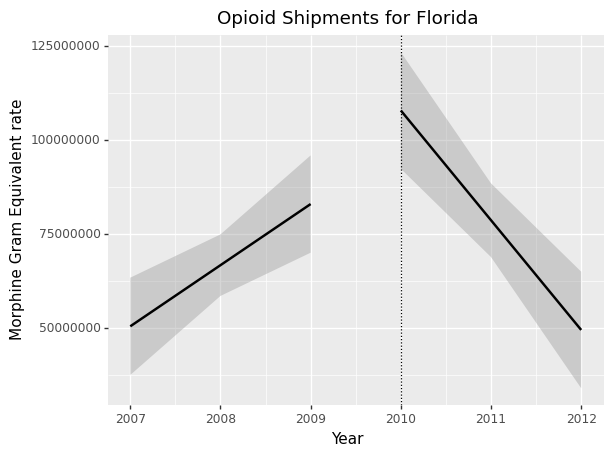

In [155]:
prepos = (
    pre_post_fl(fl_prepol_treatment, fl_postpol_treatment, "Year", "Prescription_Rate", 2010)
    + labs(
        title="Opioid Shipments for Florida"
    )
    + ylab("Morphine Gram Equivalent rate")
)

print(prepos)

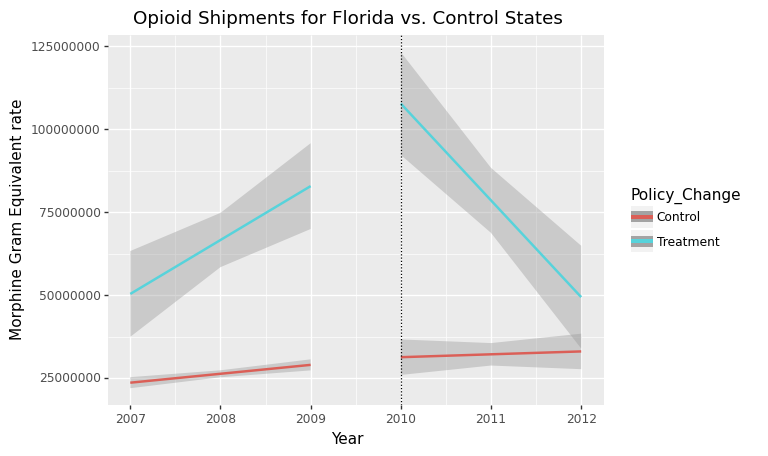

In [156]:
diff = (
    diffIndiff_fl(
        fl_prepol_control, fl_postpol_control, fl_prepol_treatment, fl_postpol_treatment, "Year", "Prescription_Rate", 2010
    )
    + labs(
        title="Opioid Shipments for Florida vs. Control States",
        color="Policy_Change",
    )
    + ylab("Morphine Gram Equivalent rate")
    + theme(legend_position="right")
)
print(diff)